In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['review_scores_value'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['review_scores_value'].max()
Min = Milan['review_scores_value'].min()
Limites = [Min, Max]
Limites

[3.33, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.67

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.10757169813716412

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.3, 5.0, 16)
intervalos

array([3.3       , 3.41333333, 3.52666667, 3.64      , 3.75333333,
       3.86666667, 3.98      , 4.09333333, 4.20666667, 4.32      ,
       4.43333333, 4.54666667, 4.66      , 4.77333333, 4.88666667,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Insuficiente",
    "Deficiente",
    "Mejorable",
    "Bajo",
    "Aceptable",
    "Bueno",
    "Muy bueno",
    "Sobresaliente",
    "Excepcional",
    "Excelente",
    "Impresionante",
    "Increíble",
    "Espectacular",
    "Fantástico",
    "Adecuado"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Milan['review_scores_value'] = pd.cut ( x = Milan ['review_scores_value'], bins = intervalos, labels = categorias )
Milan['review_scores_value']

0         Espectacular
1        Impresionante
2        Impresionante
3            Increíble
4        Impresionante
             ...      
23700     Espectacular
23701     Espectacular
23702     Espectacular
23703     Espectacular
23704     Espectacular
Name: review_scores_value, Length: 23705, dtype: category
Categories (15, object): ['Insuficiente' < 'Deficiente' < 'Mejorable' < 'Bajo' ... 'Increíble' < 'Espectacular' < 'Fantástico' < 'Adecuado']

In [12]:
table1 = freq_tbl(Milan['review_scores_value'])
table1

,review_scores_value,frequency,percentage,cumulative_perc
0,Espectacular,7520,0.317233,0.317233
1,Adecuado,4477,0.188863,0.506096
2,Fantástico,3249,0.137060,0.643155
3,Increíble,2725,0.114955,0.758110
4,Impresionante,1771,0.074710,0.832820
5,Excelente,1145,0.048302,0.881122
6,Muy bueno,1024,0.043198,0.924320
7,Excepcional,676,0.028517,0.952837
8,Sobresaliente,449,0.018941,0.971778
9,Bajo,179,0.007551,0.979329


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_value,frequency
0,Espectacular,7520
1,Adecuado,4477
2,Fantástico,3249
3,Increíble,2725
4,Impresionante,1771
5,Excelente,1145
6,Muy bueno,1024
7,Excepcional,676
8,Sobresaliente,449
9,Bajo,179


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_value')
Filtro_index

,frequency
review_scores_value,
Espectacular,7520
Adecuado,4477
Fantástico,3249
Increíble,2725
Impresionante,1771
Excelente,1145
Muy bueno,1024
Excepcional,676
Sobresaliente,449


Text(0, 0.5, 'Frecuencia')

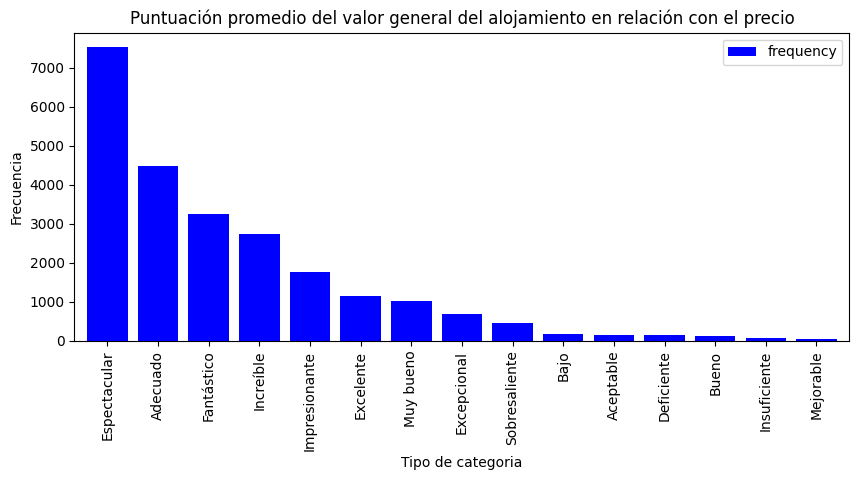

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio del valor general del alojamiento en relación con el precio')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')